# EDA on Haberman's Dataset
* DataSet - Haberman's Survival Dataset - 
    dataset on the survival of patients who had undergone surgery for breast cancer. 
* Objective - To classify the survival years 
* Details of dataset -
    1. Age of patient at time of operation (numerical)
    2. Patient's year of operation (year - 1900, numerical)
    3. Number of positive axillary nodes detected (numerical)
    4. Survival status (class attribute) 
        1 = the patient survived 5 years or longer
        2 = the patient died within 5 years


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cancer_df = pd.read_csv("C:\EDA\haberman.csv")
cancer_df.tail(5)

,Age,Op_Year,axil_nodes,Surv_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


* Each row is called data-points/Observation/independent-variables except the dependent variable(Surv_status)
* Surv_status is the class label or dependent-variable
* Features are the columns

In [4]:
cancer_df.shape

(306, 4)

* Checking the row & column count for the dataset

In [5]:
cancer_df.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [6]:
#renaming columns
cancer_df.columns = ['patient_age','operation_year','positive_axil_nodes','survival_after_5_years']

In [7]:
cancer_df.columns

Index(['patient_age', 'operation_year', 'positive_axil_nodes',
       'survival_after_5_years'],
      dtype='object')

In [8]:
#checking the balance for class label
cancer_df.survival_after_5_years.value_counts()

1    225
2     81
Name: survival_after_5_years, dtype: int64

# Observation
* Slightly Imbalanced dataset 

* changing the class-label from numerical to categorical for better analysis

In [9]:
myCategory = [1,2]
cancer_df['survival_after_5_years'] = pd.Categorical(cancer_df['survival_after_5_years'], categories=myCategory, ordered=True)
cancer_df['survival_after_5_years'] = cancer_df['survival_after_5_years'].map({1:"yes", 2:"no"})

In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   patient_age             306 non-null    int64   
 1   operation_year          306 non-null    int64   
 2   positive_axil_nodes     306 non-null    int64   
 3   survival_after_5_years  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [11]:
cancer_df.survival_after_5_years.unique()

['yes', 'no']
Categories (2, object): ['yes' < 'no']

In [12]:
cancer_df.tail()

,patient_age,operation_year,positive_axil_nodes,survival_after_5_years
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


# 2D Scatter PLot

<AxesSubplot:xlabel='patient_age', ylabel='positive_axil_nodes'>

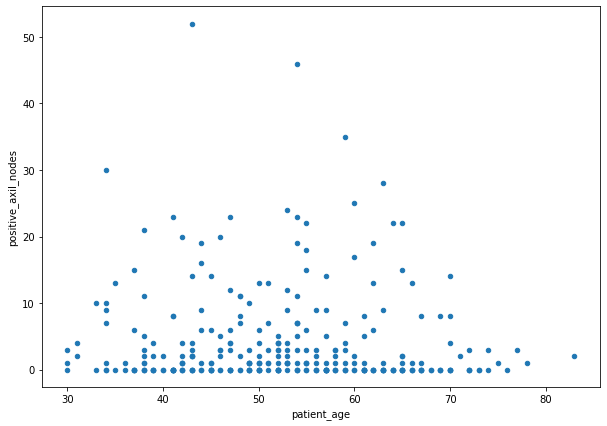

In [13]:
cancer_df.plot(kind ='scatter', x='patient_age', y='positive_axil_nodes', figsize=(10, 7))
#plt.show()

# Using sns to do some more formatting on plots


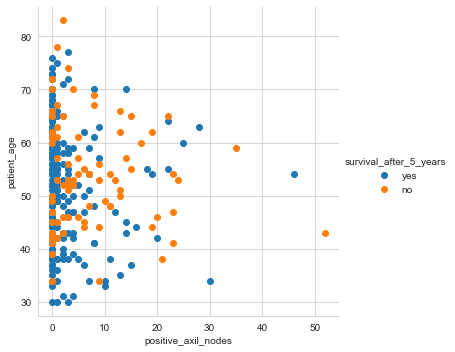

In [28]:

sns.set_style("whitegrid")
sns.FacetGrid(cancer_df, hue='survival_after_5_years',height =5)\
.map(plt.scatter, 'positive_axil_nodes','patient_age')\
.add_legend()
plt.show()

# Observations
* Not very useful plot to analyse 
* Its difficult to differentiate between the two classes using 2D plot



# 3D plot- Pair plot (Multivariate Analysis)

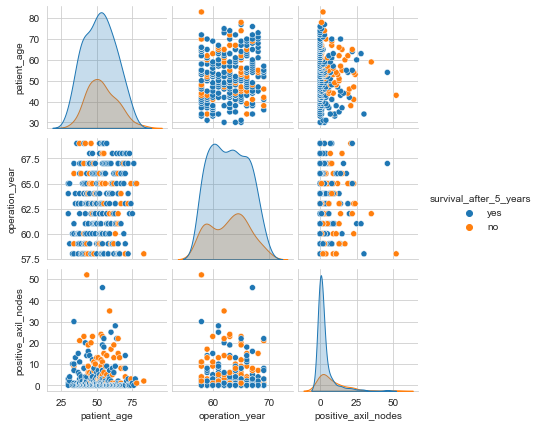

In [23]:
plt.close()

sns.pairplot(cancer_df,hue='survival_after_5_years', height=2)

* Observation - 
    1. Very hazy for now , not very useful
    2. Lets check Univariate analysis

# FaceTgrid (Univariate Analysis)

C:\Users\Harshita.Singh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshita.Singh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


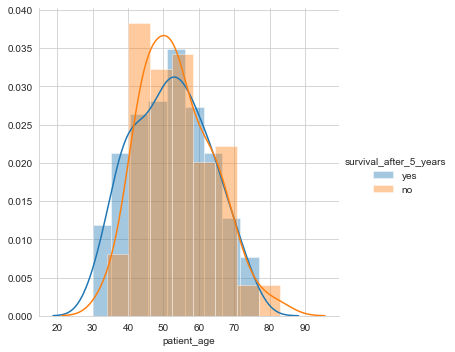

In [42]:
plt.close();
sns.FacetGrid(cancer_df, hue="survival_after_5_years", height=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.show();

Observations -- 
1. Patient's from same age group have survived or not-survived
2. Survival of petient is gradually increasing & then decreasing for older people
3. Not very useful

C:\Users\Harshita.Singh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshita.Singh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


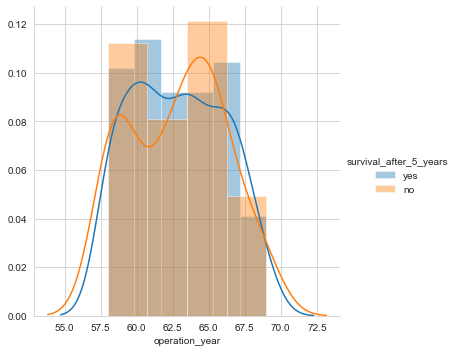

In [46]:
plt.close()
sns.FacetGrid(cancer_df, hue='survival_after_5_years', height=5) \
.map(sns.distplot, 'operation_year', ) \
.add_legend()

plt.show()

* Observations :
    1. survival is on the peak in the year 1960 
    2. Survival is decreasing over time
    3. Death increased drastically from 70% to 105% approx from 1961 to 1964
    
    